In [66]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/102.4 MB 656.4 kB/s eta 0:02:36
   ---------------------------------------- 0.1/102.4 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.3/102.4 MB 1.9 MB/s eta 0:00:54
   ---------------------------------------- 0.6/102.4 MB 2.7 MB/s eta 0:00:39
   ---------------------------------------- 0.9/102.4 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.2/102.4 MB 4.2 MB/s eta 0:00:25
    --------------------------------------- 1.8/102.4 MB 5.4 MB/s eta 0:00:19
    --------------------------------------- 2.4/102.4 MB 6.3 MB/s eta 0:00:16
   - -------------------------------------- 3.0/102.4 MB 6.8 MB/s eta 0:00:15
   - -------------------------------------- 3.6/102.4 MB 7.8 MB/s eta 0:00:1

In [63]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # or the number of cores you want


In [1]:
import pandas as pd
import numpy as np
import json
import os

In [2]:
df = pd.read_csv(r"D:\Sanskar\TelecoChurnMlendtoend\Dataset\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Drop CustomerID Feature(column)
df = df.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
# totalCharges = df.columns.get_loc('TotalCharges')
# new_col = pd.to_numeric(df.iloc[:, totalCharges],errors = 'coerce')
# df.iloc[:, totalCharges] = pd.Series(new_col)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
print(df['TotalCharges'].dtype)

float64


In [9]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


In [10]:
# Handle any NaN values
print(df.isnull().values.any())
df.isnull().sum()

True


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df[df["TotalCharges"].isna()][["tenure", "MonthlyCharges", "TotalCharges"]]


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [12]:
df = df.dropna(subset = ["TotalCharges"])

In [13]:
print(df.isnull().values.any())
df.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != 'Churn']
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != 'Churn']
continuous_features = [x for x in all_features if x not in categorical_features]

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


sns.set(style='darkgrid')
sns.set_palette('hls',3)

Churn
No     5163
Yes    1869
dtype: int64


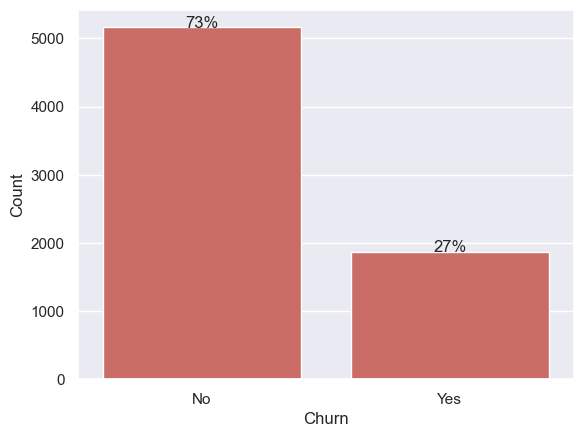

In [16]:
print(df.groupby(['Churn']).size())
churn_plot = sns.countplot(data=df, x='Churn', order=df.Churn.value_counts().index)
plt.ylabel('Count')
for p in churn_plot.patches:
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df))),ha="center") 
plt.show()

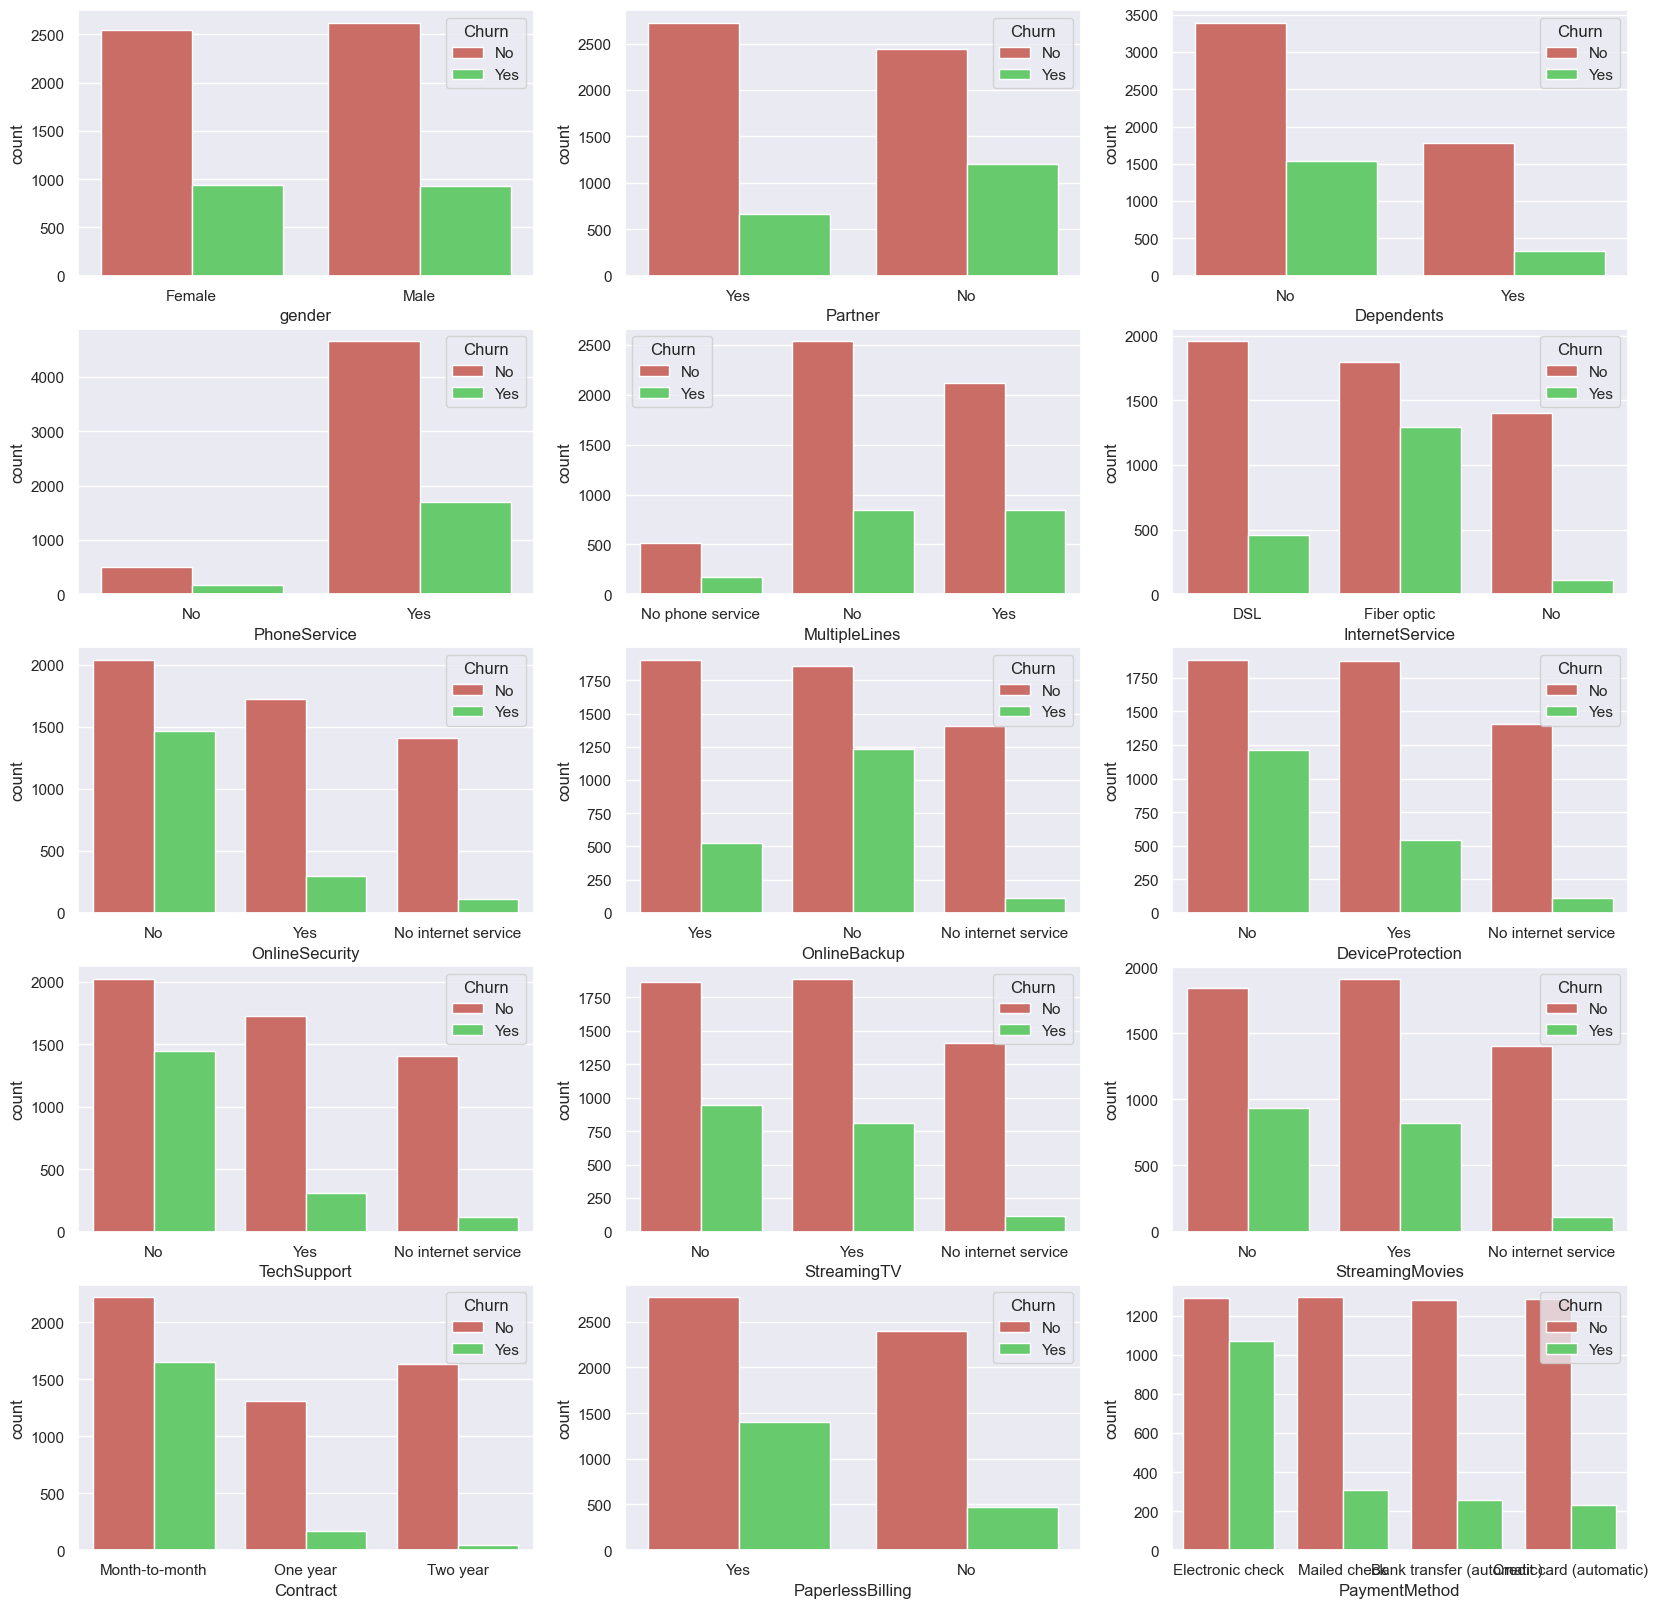

In [17]:
# Categorical feature count plots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15 ]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=df, ax=ax[i])

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

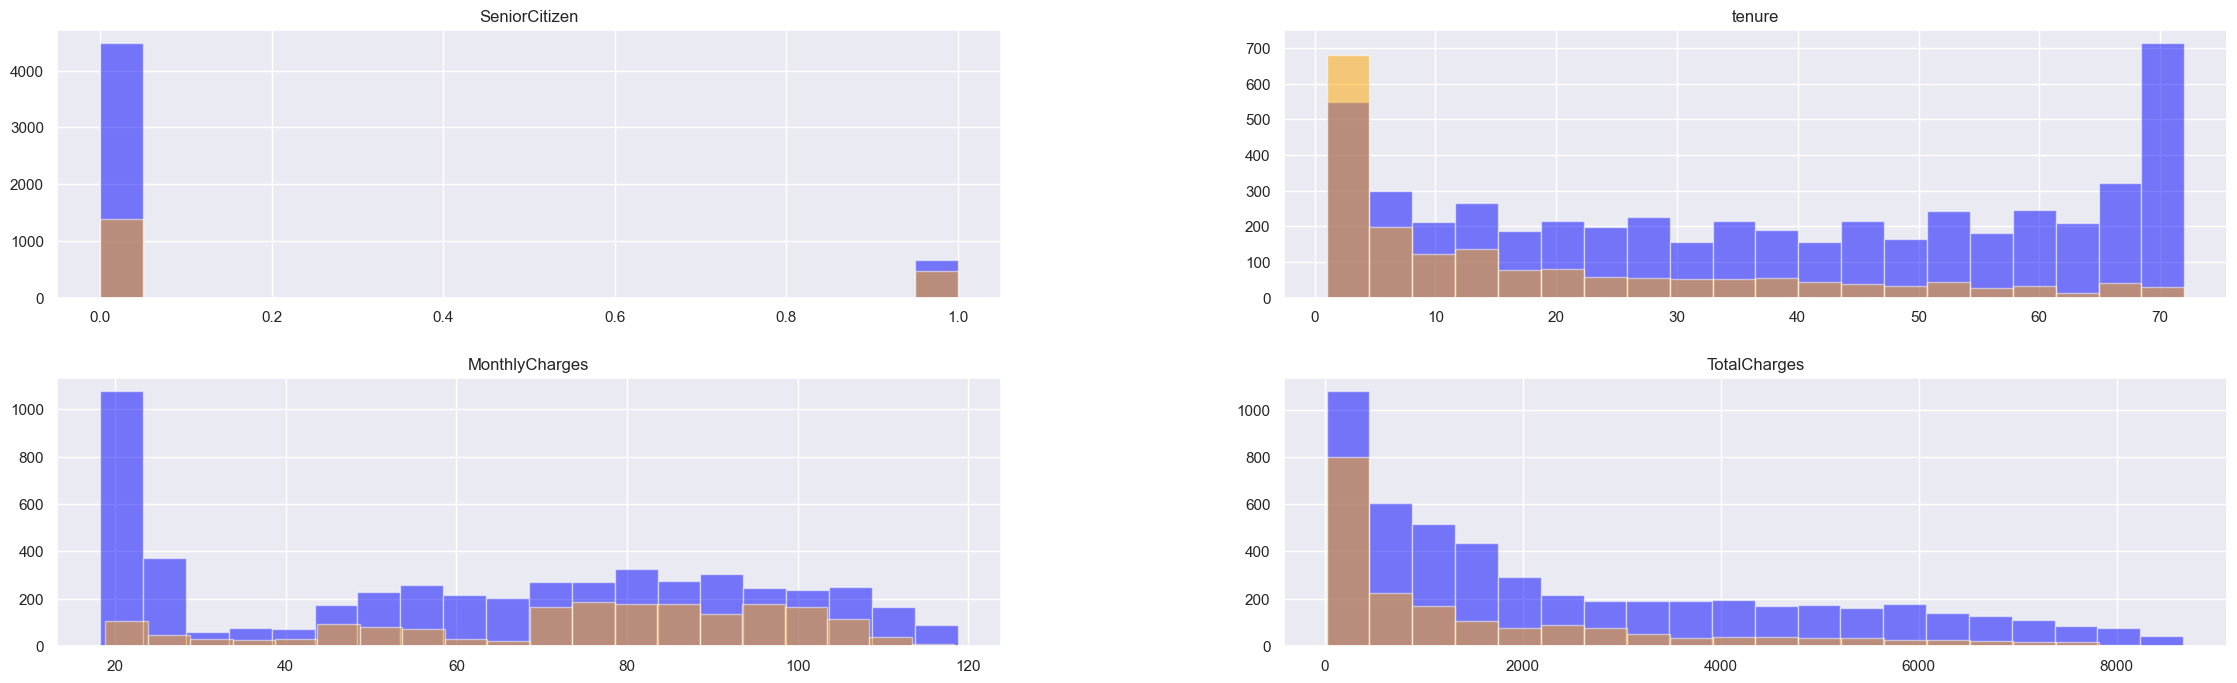

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(28, 8))
df[df.Churn == 'No'][continuous_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][continuous_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

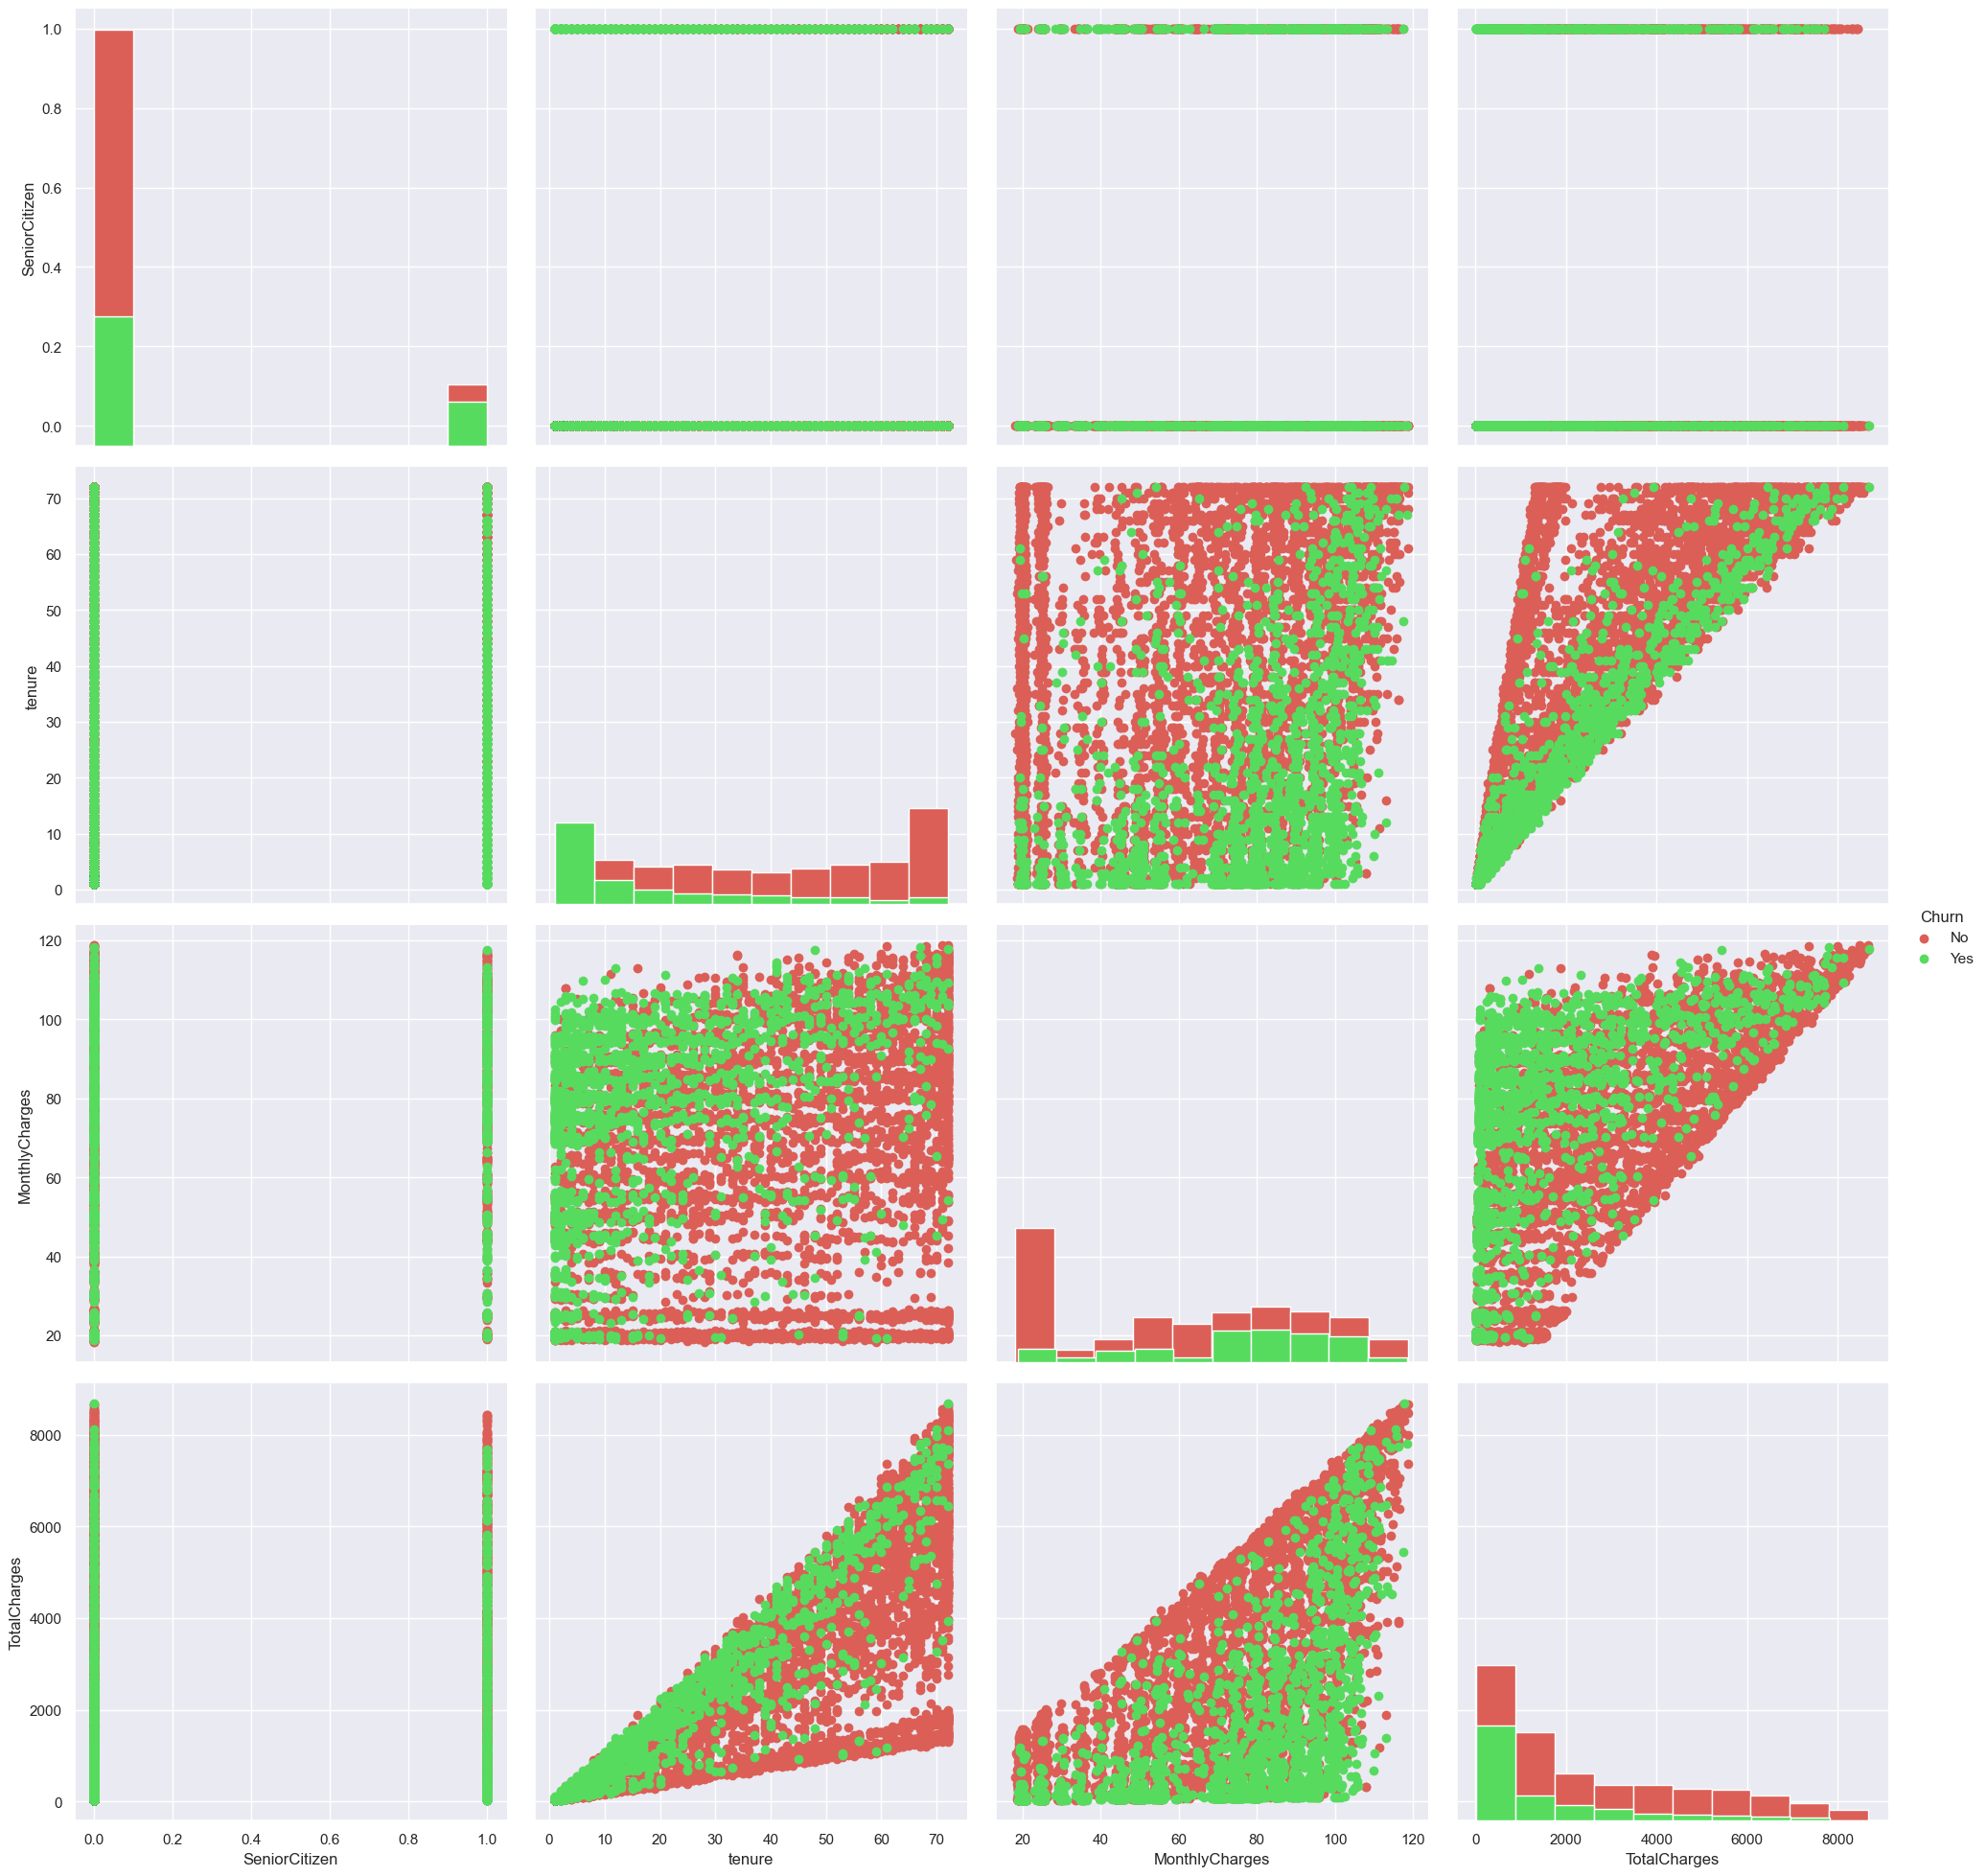

In [19]:
gr = sns.PairGrid(df, height=5, hue="Churn")
gr = gr.map_diag(plt.hist)
gr = gr.map_offdiag(plt.scatter)
gr = gr.add_legend()

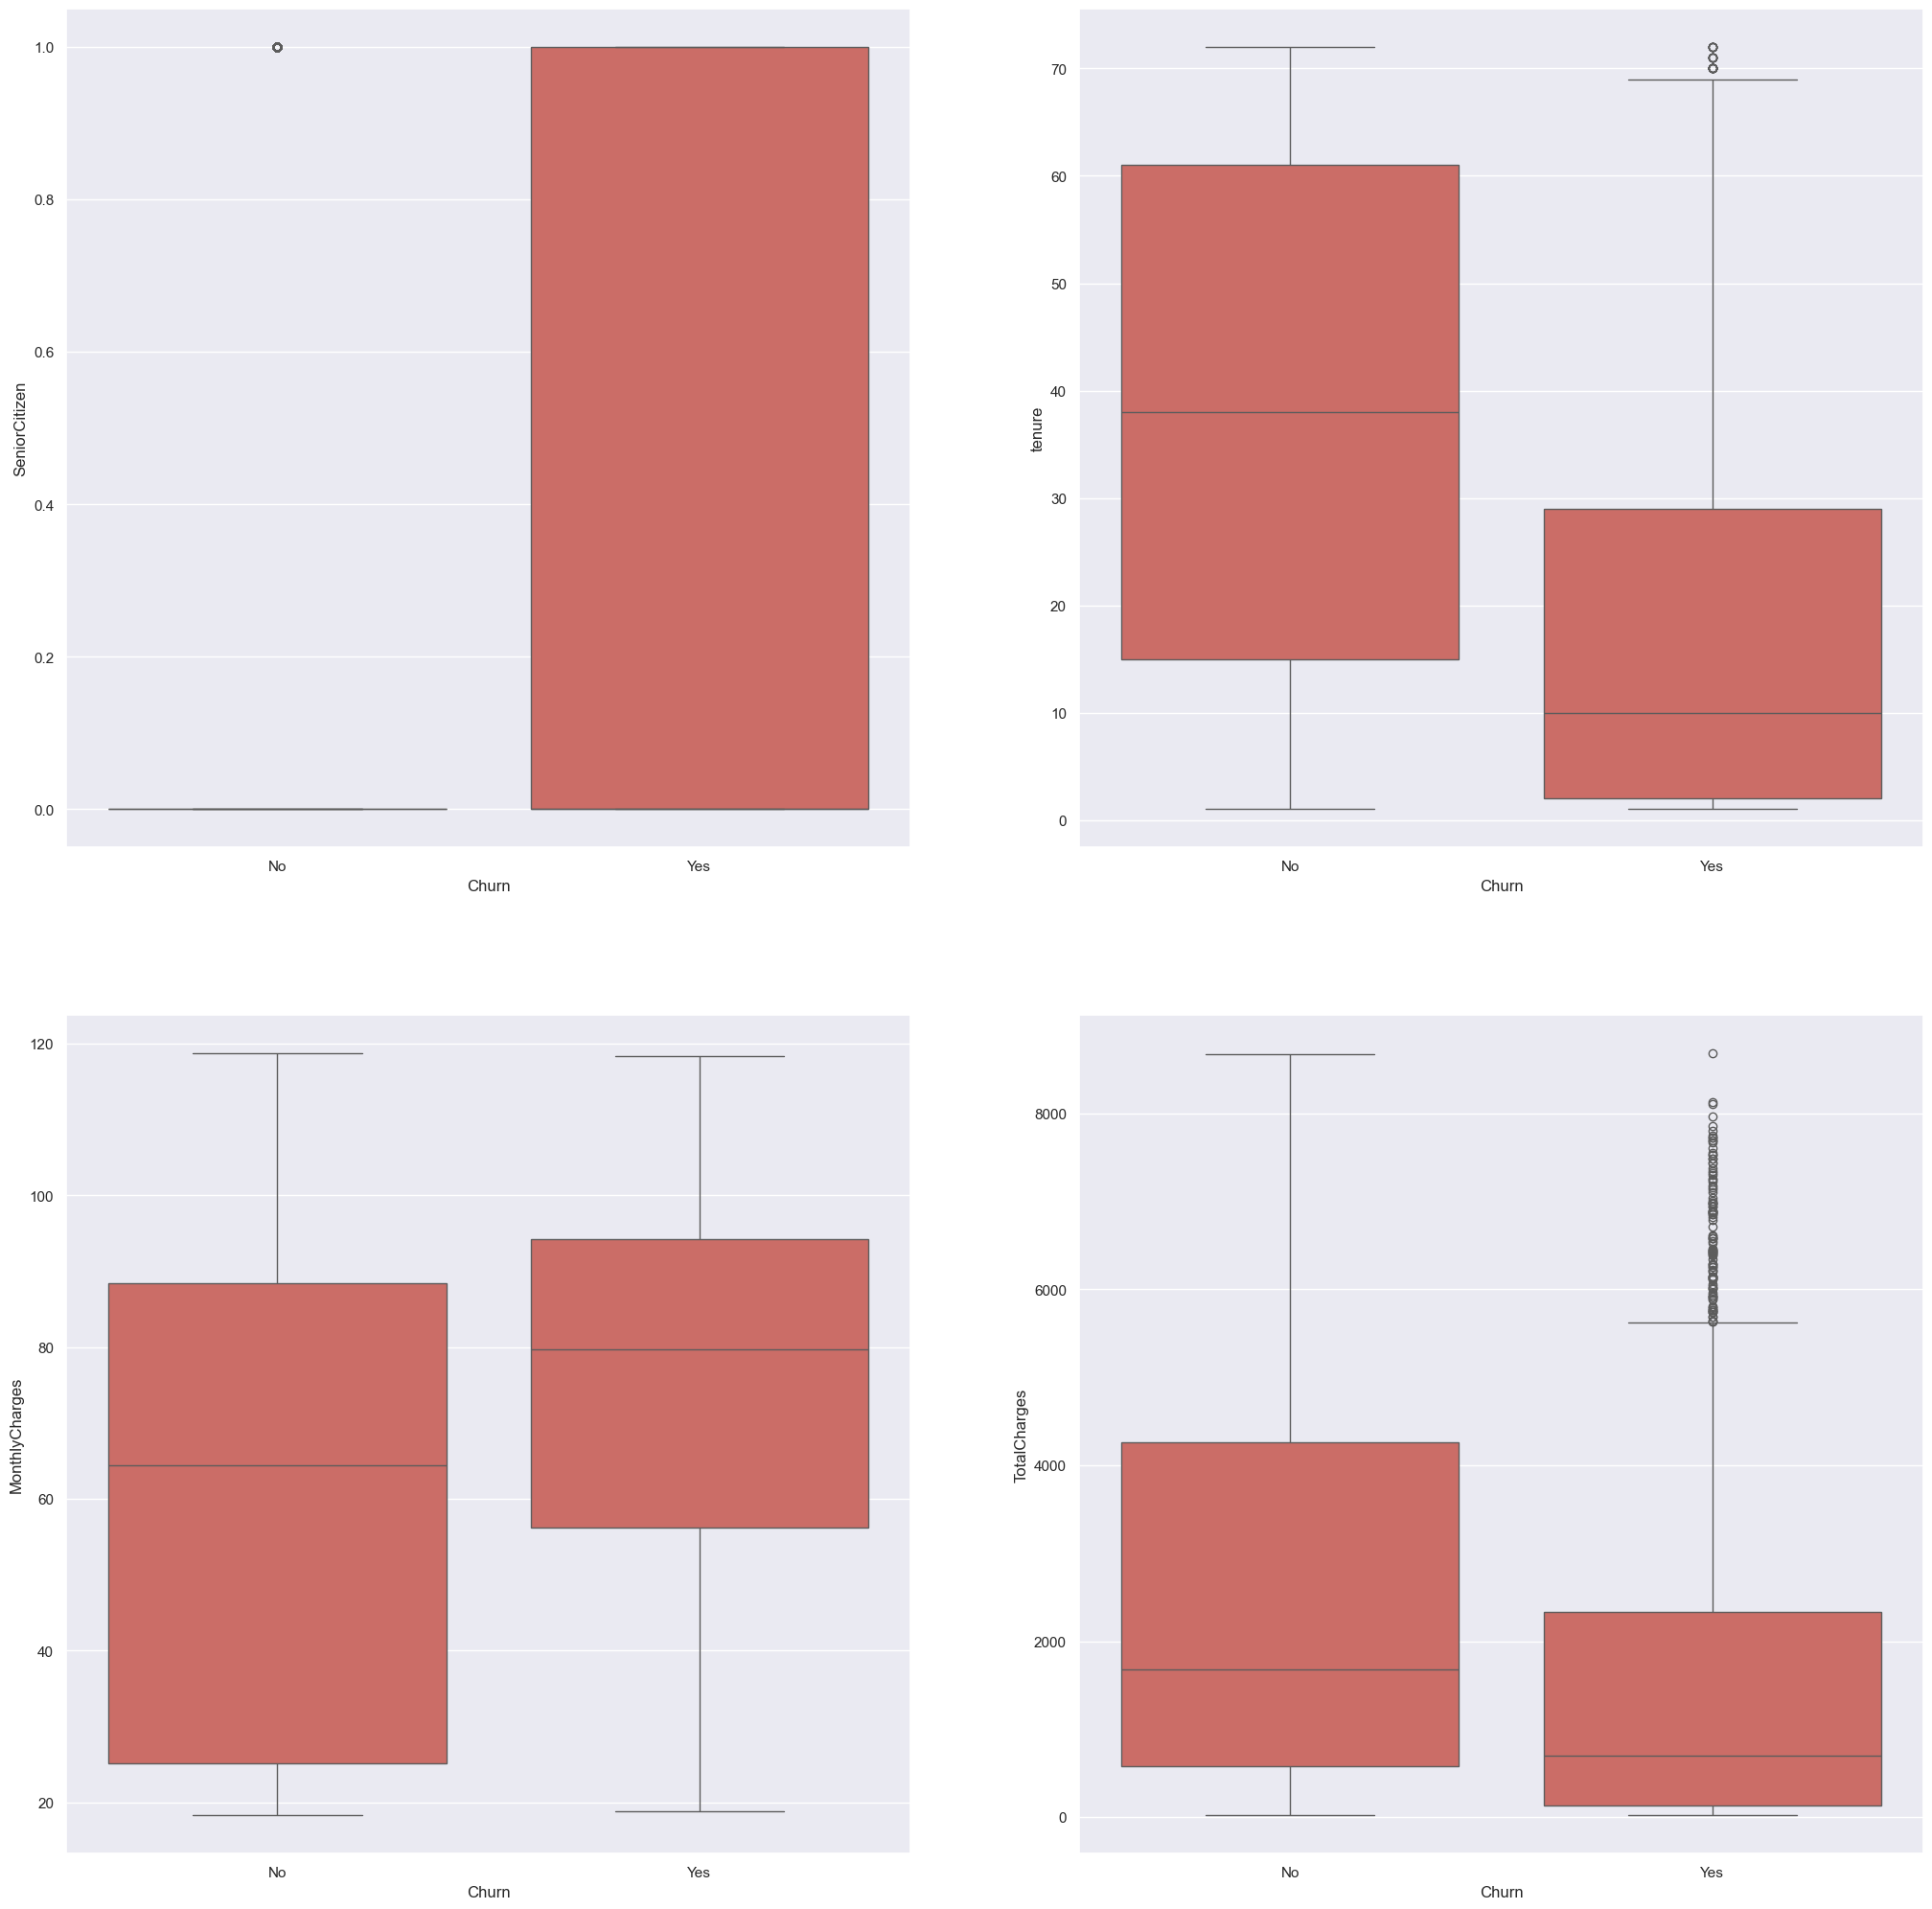

In [20]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 25))
ax = [ax1, ax2, ax3, ax4]

for i in range(len(continuous_features)):
    sns.boxplot(x = 'Churn', y = continuous_features[i], data=df, ax=ax[i])

In [34]:
import pandas as pd

# target
y = df["Churn"]

# features
X = df.drop(columns=["Churn"])


In [35]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_cols, numeric_cols


(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import joblib

# target
y = df["Churn"]

# features
X = df.drop(columns=["Churn"])

# your detected column groups
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod']

numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest model
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced",   # handles imbalance in churn dataset
    ))
])

# train
clf.fit(X_train, y_train)

# predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

# save model
joblib.dump(clf, "churn_random_forest.pkl")
print("Model saved as churn_random_forest.pkl")


Accuracy: 0.7839374555792467
ROC-AUC: 0.8135809722991546
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1033
         Yes       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Model saved as churn_random_forest.pkl


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define categorical and numeric columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Random Forest with class weights
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight={'No':1, 'Yes':3},  # increase weight for churn
    random_state=42
)

# Full pipeline
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('rf', rf)
])

# Fit the model
rf_pipeline.fit(X_train, y_train)  # y_train is still 'No'/'Yes'


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('rf',
                 RandomForestClassifier(class_weight={'No': 1, 'Yes': 3},
                                        max_depth=8, min_samples_leaf=4,
                                        n_estimators=200, random_state=42))])

Accuracy: 0.7370291400142146
ROC-AUC: 0.8302941435308613
              precision    recall  f1-score   support

          No       0.90      0.73      0.80      1033
         Yes       0.50      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



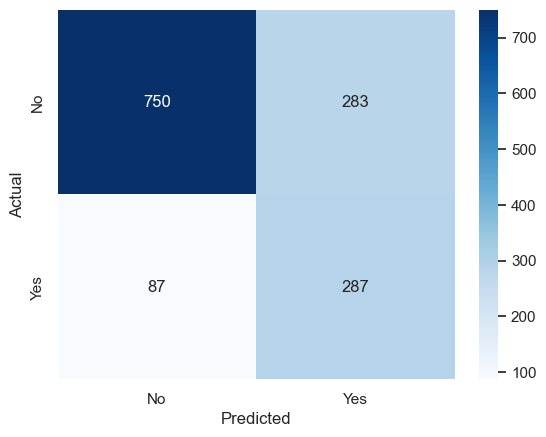

In [61]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_pipeline.predict(X_test)
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test.map({'No':0,'Yes':1}), y_prob))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [64]:
from imblearn.over_sampling import SMOTE

# OneHotEncode categorical features first
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_encoded, y_train.map({'No':0,'Yes':1}))

# Train Random Forest on balanced data
rf_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
rf_smote.fit(X_res, y_res)

# Predict
y_pred = rf_smote.predict(X_test_encoded)
y_prob = rf_smote.predict_proba(X_test_encoded)[:,1]

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test.map({'No':0,'Yes':1}), y_pred))
print("ROC-AUC:", roc_auc_score(y_test.map({'No':0,'Yes':1}), y_prob))
print(classification_report(y_test.map({'No':0,'Yes':1}), y_pred))


Accuracy: 0.7661691542288557
ROC-AUC: 0.8232873982119469
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407



In [67]:
# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Preprocessing & pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Imbalance handling
from imblearn.over_sampling import SMOTE

# Utilities
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Encode target
y_train_num = y_train.map({'No':0, 'Yes':1})
y_test_num = y_test.map({'No':0, 'Yes':1})


In [69]:
# OneHotEncode categorical features
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# SMOTE on encoded training data
X_train_encoded = preprocessor_rf.fit_transform(X_train)
X_test_encoded = preprocessor_rf.transform(X_test)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_encoded, y_train_num)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_res, y_res)


RandomForestClassifier(max_depth=8, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [70]:
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    scale_pos_weight=len(y_train_num[y_train_num==0])/len(y_train_num[y_train_num==1]),
    random_state=42
)
xgb.fit(X_res, y_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [71]:
# CatBoost accepts categorical columns as indices
cat_features_indices = [X_train.columns.get_loc(c) for c in cat_cols]

catboost = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    eval_metric='F1',
    random_seed=42,
    verbose=0,
    class_weights=[1, len(y_train_num[y_train_num==0])/len(y_train_num[y_train_num==1])]
)
catboost.fit(X_train, y_train_num, cat_features=cat_features_indices)


              accuracy   roc_auc    f1_yes  recall_yes
RandomForest  0.766169  0.823287  0.591304    0.636364
XGBoost       0.744136  0.811491  0.585253    0.679144
CatBoost      0.733475  0.826102  0.598071    0.745989


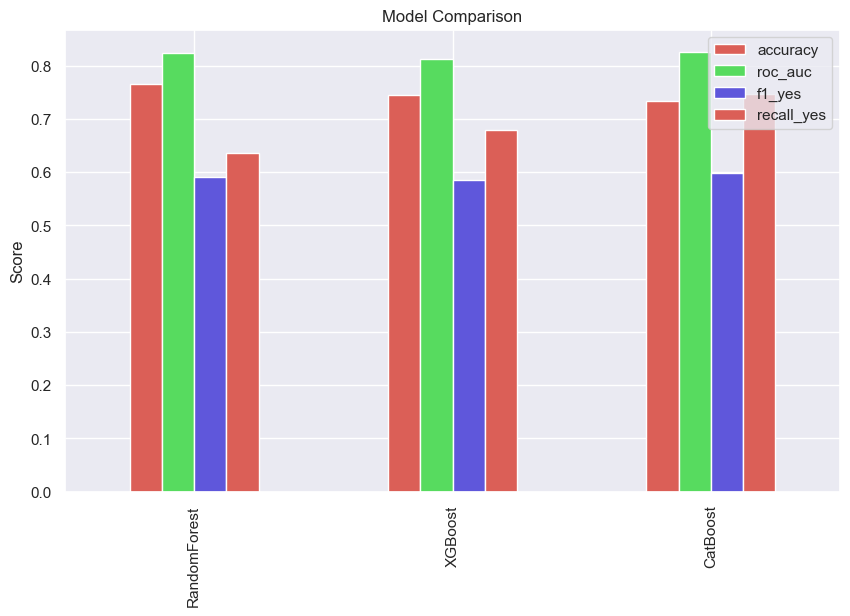

In [83]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score

models = {'RandomForest': rf, 'XGBoost': xgb, 'CatBoost': catboost}
results = {}

# Determine the positive class: 1 or 'Yes'
pos_class = 1  # If using numeric labels; set to 'Yes' if using strings

for name, model in models.items():
    # Predict
    if name == 'CatBoost':
        y_pred = model.predict(X_test)
        y_pred = y_pred.astype(int)  # convert float to int
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_pred = model.predict(X_test_encoded)
        y_prob = model.predict_proba(X_test_encoded)[:,1]

    # Metrics
    acc = accuracy_score(y_test_num, y_pred)
    roc = roc_auc_score(y_test_num, y_prob)
    f1 = f1_score(y_test_num, y_pred, pos_label=pos_class)
    recall = recall_score(y_test_num, y_pred, pos_label=pos_class)

    results[name] = {
        'accuracy': acc,
        'roc_auc': roc,
        'f1_yes': f1,
        'recall_yes': recall
    }

# Compare results
results_df = pd.DataFrame(results).T
print(results_df)

# Optional: Bar plot
results_df[['accuracy','roc_auc','f1_yes','recall_yes']].plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


In [84]:
import joblib
joblib.dump(catboost, "catboost_churn_model.pkl")


['catboost_churn_model.pkl']

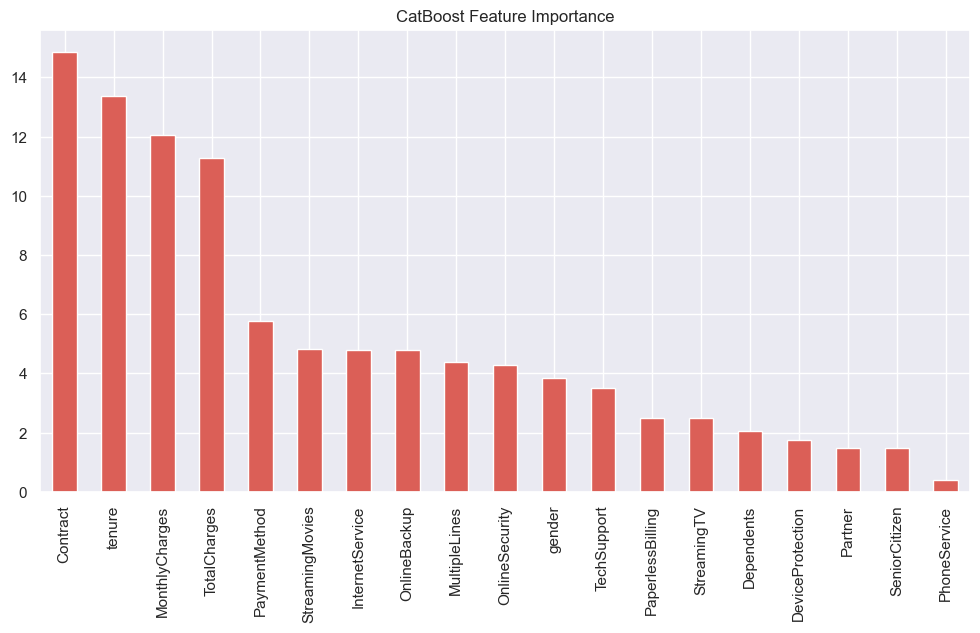

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(catboost.get_feature_importance(), index=X_train.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("CatBoost Feature Importance")
plt.show()
